For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

# Has the network latency gone up since we switched internet service providers?

In [1]:
H0 = "There is no difference in latency since switching network providers"

In [2]:
Ha = 'There is an increase in latency since switching network providers'

In [3]:
true_positive = 'we thought there was more latency since switching providers and there was'

In [4]:
true_negative = 'we thought there was no difference in latency since switching providers, and there was none'

In [5]:
type1 = 'there was no discernable change in latency, but we thought there was'

In [6]:
type2 = 'there was a discernable change in latency, but we thought there was not'

# Is the website redesign any good?

In [7]:
H0 = 'there is no increase in web traffic since redisigning the website'

In [8]:
Ha = 'there is an increase in web traffic since redisgning the website'

In [9]:
true_positive = 'we thought there was an increase in wrb traffic since the redesign, and there was'

In [10]:
true_negative = 'we thought there was no difference in web traffic since the redesign, and there was none'

In [11]:
type1 = 'there is no increase in web traffic, but we thought there was'

In [12]:
type2 = 'there was an increase in web traffic, but we thought there was not'

# Is our television ad driving more sales?

In [13]:
H0 = 'there is no change in sales since our television ad aired'

In [14]:
Ha = 'there is an increase in sales since our television ad aired'

In [15]:
true_positive = 'we thought there was an increase in sales since our television ad aired, and there was'

In [16]:
true_negative = 'we thought there was no difference in sales since our television ad aired, and there was none'

In [17]:
type1 = 'there is no increase in sales, but we thought there was'

In [18]:
type2 = 'there was an increase in sales, but we thought there was not'

In [19]:
from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics

# T-Test

## Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

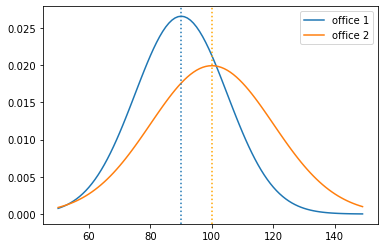

In [20]:
# Visualize two distribution:

x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)


plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')


plt.legend()

In [21]:
#Using Scipy 
α = 0.05
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html

t, p = stats.ttest_ind_from_stats(100,20,50, 90,15,40)
t,p

(2.6252287036468456, 0.01020985244923939)

In [22]:
print('Since the p-value is less than the alpha, we reject the null hypothesis')

Since the p-value is less than the alpha, we reject the null hypothesis


## Load the mpg dataset and use it to answer the following questions:

In [23]:
mpg = data('mpg')
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


$H_0$: there is no difference in fuel-efficiency in cars from 2008 vs 1999

$H_a$: there is a difference in fuel-efficiency in cars from 2008 vs 1999

Calculate average fuel economy assuming 50% highway and 50% city driving

Should I use arithmetic mean or harmonic mean for average mpg?

Arithmetic Mean: fe_am = (cty + hwy)/2

Harmonic Mean: fe_hm = 2/(1/cty + 1/hwy)

In [24]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [25]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

In [26]:
t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [27]:
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

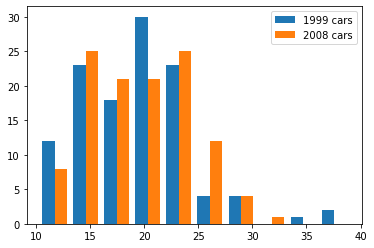

In [28]:
plt.hist([fe_1999, fe_2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

### Are compact cars more fuel-efficient than the average car?

Comparing fuel economy two different sub-groups (1-sample, 1-tailed t-test)

$H_0$: There is no difference in fuel-efficiency between compact cars and the population average fuel-efficiency

$H_a$: Compact cars are more fuel efficient than the average car

for $H_a$ to be true, t > 0 and p/2 < 0.05

In [29]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

t, p = stats.ttest_1samp(fe_compact, μ)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [30]:
print(f'''
Because p/2 ({p/2:.12f}) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.
''')


Because p/2 (0.000000000781) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.



### Do manual cars get better gas mileage than automatic cars?


$H_0$: there is no difference in fuel-efficiency between manual cars and automatic transmission cars

$H_a$: there is a difference in fuel-efficiency between manual cars and automatic transmission cars

In [31]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

In [32]:
t, p = stats.ttest_ind(fe_manual, fe_auto)
t, p

(4.652577547151351, 5.510464610044005e-06)

In [33]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars
''')


Because p/2 (0.000003) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars



# Correlation

## Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [34]:
telco_churn = pd.read_csv('Cust_Churn_Telco.csv')

telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
r, p = stats.pearsonr(telco_churn.tenure, telco_churn.MonthlyCharges)

In [36]:
r

0.24789985628615002

In [37]:
p

4.0940449915016345e-99

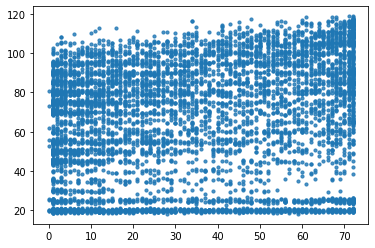

In [38]:
plt.scatter(telco_churn.tenure,telco_churn.MonthlyCharges, s=10, alpha=0.8)

In [39]:
telco_churn=telco_churn.dropna()

In [40]:
r, p = stats.pearsonr(telco_churn.tenure, telco_churn.TotalCharges)

In [41]:
r

0.825880460933202

In [42]:
p

0.0

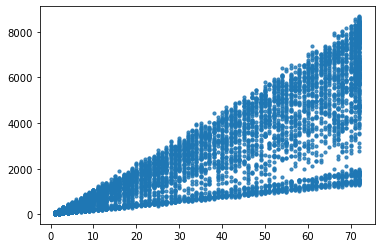

In [43]:
plt.scatter(telco_churn.tenure,telco_churn.TotalCharges, s=10, alpha=0.8)

In [44]:
telco_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [45]:
telco_phone = telco_churn[telco_churn.PhoneService == 'Yes']

telco_phone.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No


In [46]:
r, p = stats.pearsonr(telco_phone.tenure, telco_phone.MonthlyCharges)

In [47]:
r

0.24419396575193236

In [48]:
p

6.82801603762022e-87

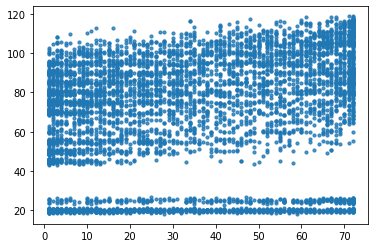

In [49]:
plt.scatter(telco_phone.tenure,telco_phone.MonthlyCharges, s=10, alpha=0.8)

In [50]:
r, p = stats.pearsonr(telco_phone.tenure, telco_phone.TotalCharges)

In [51]:
r

0.8298393210699408

In [52]:
p

0.0

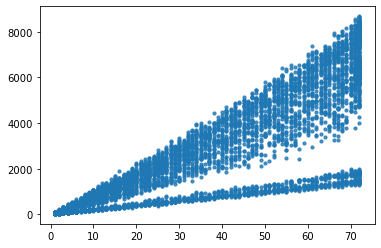

In [53]:
plt.scatter(telco_phone.tenure,telco_phone.TotalCharges, s=10, alpha=0.8)

In [54]:
telco_internet = telco_churn[telco_churn.InternetService != 'No']

telco_internet.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [55]:
r, p = stats.pearsonr(telco_internet.tenure, telco_internet.MonthlyCharges)

In [56]:
r

0.37203919761332416

In [57]:
p

1.6186841401711697e-180

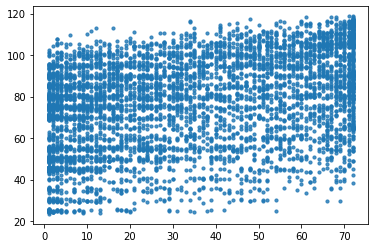

In [58]:
plt.scatter(telco_internet.tenure,telco_internet.MonthlyCharges, s=10, alpha=0.8)

In [59]:
r, p = stats.pearsonr(telco_internet.tenure, telco_internet.TotalCharges)

In [60]:
r

0.9319346187418096

In [61]:
p

0.0

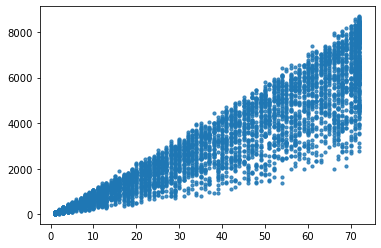

In [62]:
plt.scatter(telco_internet.tenure,telco_internet.TotalCharges, s=10, alpha=0.8)

## Use the employees database.

In [67]:
from env import host, user, password

In [63]:
from sqlalchemy import create_engine 

In [64]:
## pd.read_sql(sql, get_db_url(user, host, password, 'employees'))

In [86]:
sql = '''
select *
from employees
join salaries on employees.emp_no;
'''

In [80]:
def get_connection(db, user, host, password):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return create_engine(url)

In [81]:
conn = get_connection('employees', user, host, password)

In [ ]:
employees = pd.read_sql(sql, conn)

employees

### Is there a relationship between how long an employee has been with the company and their salary?

In [78]:
r, p = stats.pearsonr(employees.from_date, employees.salary)

TypeError: unsupported operand type(s) for +: 'float' and 'datetime.date'

In [ ]:
employees['time'] = curdate() - 